In [1]:
import pandas as pd
donnees_techniques = pd.read_csv("D:/Formations/Data analysis Python/Data/RT_donnees_techniques_Par_Tch.csv")

In [2]:
epaisseur_alteration = donnees_techniques["Prof_Toit"]
epaisseur_alteration.describe()

count    287.000000
mean      18.738885
std       11.665793
min        0.000000
25%        9.220000
50%       19.000000
75%       27.525000
max       54.000000
Name: Prof_Toit, dtype: float64

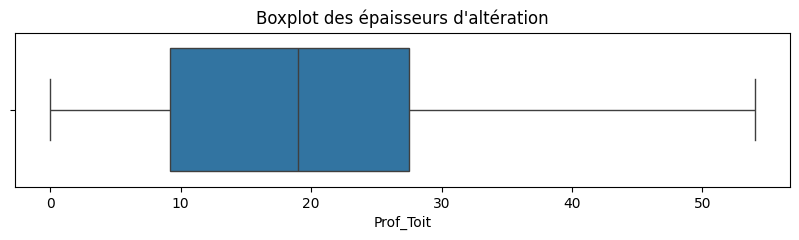

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=epaisseur_alteration)
plt.title("Boxplot des épaisseurs d'altération")
plt.show()

Au niveau des épaisseurs d'altération, on observe une variation entre 0 et 54 m. En zone de socle, l'altération est la première partie qu'on voit lorsqu'on effectue un forage. La valeur 0 signifie donc qu'il n'y a pas d'altération et que sur le site foré, l'horizon fissuré est la première couche. Nous avons donc entrepris ici, de supprimer les valeurs inférieures à 5 m.

In [4]:
#Filtrer les valeurs faibles (< 5 m)
valeurs_faibles = epaisseur_alteration[(epaisseur_alteration < 5)]

# Afficher les lignes correspondantes avec les colonnes utiles
donnees_techniques.loc[valeurs_faibles.index, ['Prof_Toit']]

,Prof_Toit
6,0.00
17,0.00
59,3.00
100,0.00
135,2.00
139,0.00
140,0.00
142,0.00
171,4.00
188,0.00


In [5]:
epaisseur_alteration_valide = epaisseur_alteration[epaisseur_alteration >= 5]
print(epaisseur_alteration_valide.describe())

count    256.000000
mean      20.841953
std       10.538809
min        5.000000
25%       11.000000
50%       20.500000
75%       28.600000
max       54.000000
Name: Prof_Toit, dtype: float64


In [6]:
import numpy as np

#Détermination de la taile de l'échantilion
n = len(epaisseur_alteration_valide)
# Calcul du nombre de classes avec la formule de Sturges
C = int(1 + 3.3 * np.log10(n))

print(f"Nombre de classes (Sturges) : {C}")

Nombre de classes (Sturges) : 8


In [7]:
# Détermination des bornes min et max
xmin = epaisseur_alteration_valide.min()
xmax = epaisseur_alteration_valide.max()

# Amplitude des classes
I = (xmax - xmin) / C

print(f"Amplitude des classes : {I:.2f}")

Amplitude des classes : 6.12


In [8]:
bornes_classes = np.arange(xmin, xmax + I, I)

# Affichage des intervalles
classes = []
for i in range(len(bornes_classes) - 1):
    classes.append(f"[{bornes_classes[i]:.2f} – {bornes_classes[i+1]:.2f}[")  # intervalle semi-ouvert

print("Liste des classes :")
for c in classes:
    print(c)

Liste des classes :
[5.00 – 11.12[
[11.12 – 17.25[
[17.25 – 23.38[
[23.38 – 29.50[
[29.50 – 35.62[
[35.62 – 41.75[
[41.75 – 47.88[
[47.88 – 54.00[


In [9]:
# Histogramme : counts = effectif, bin_edges = bornes
counts, bin_edges = np.histogram(epaisseur_alteration_valide, bins=bornes_classes)

# Nombre total de forages
total = counts.sum()

# Affichage des classes et effectifs
print("Liste des classes avec pourcentages :\n")
for i in range(len(counts)):
    pourcentage = (counts[i] / total) * 100
    print(f"[{bin_edges[i]:.2f} – {bin_edges[i+1]:.2f}[ : {counts[i]} valeurs ({pourcentage:.1f}%)")

Liste des classes avec pourcentages :

[5.00 – 11.12[ : 65 valeurs (25.4%)
[11.12 – 17.25[ : 36 valeurs (14.1%)
[17.25 – 23.38[ : 56 valeurs (21.9%)
[23.38 – 29.50[ : 38 valeurs (14.8%)
[29.50 – 35.62[ : 36 valeurs (14.1%)
[35.62 – 41.75[ : 16 valeurs (6.2%)
[41.75 – 47.88[ : 7 valeurs (2.7%)
[47.88 – 54.00[ : 2 valeurs (0.8%)


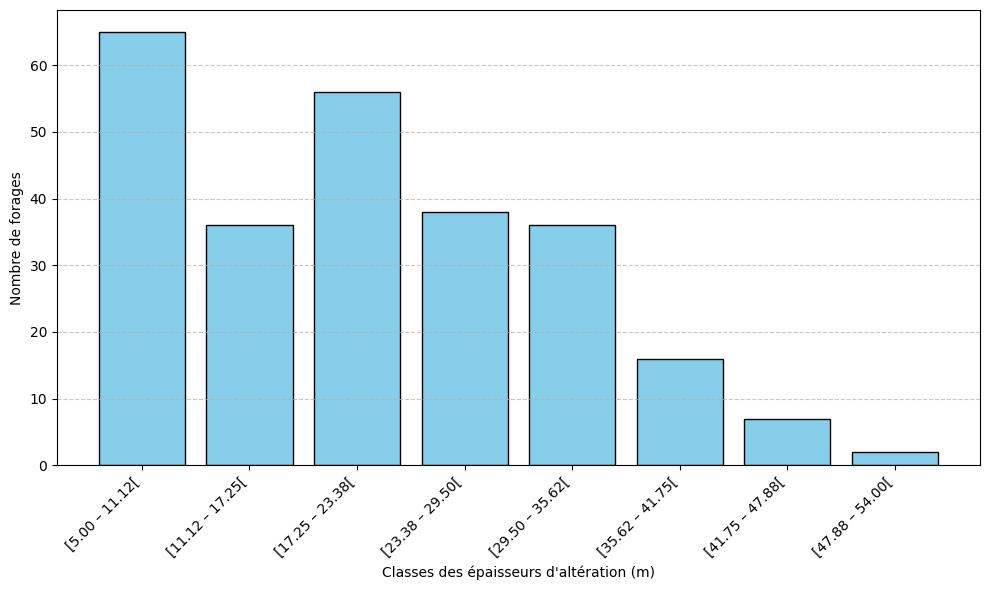

In [10]:
# Création des étiquettes de classes pour l'axe x
etiquettes_classes = [f"[{bin_edges[i]:.2f} – {bin_edges[i+1]:.2f}[" for i in range(len(counts))]

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(etiquettes_classes, counts, color='skyblue', edgecolor='black')

plt.xlabel("Classes des épaisseurs d'altération (m)")
plt.ylabel("Nombre de forages")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

L'étude montre que les forages de Parakou et de Tchaourou ont des épaisseurs d'altération qui varient majoritairement (près de 60%) entre 45 m et 67 m. Cela correspond aux travaux de Vouillamouz et al, 2015 qui ont trouvé que sur la zone de socle béninoise, 50% des forages positifs ont une profondeur qui se trouve entre 43 et 60 m.

In [12]:
#Exportation des altération corrigées vers un csv
epaisseur_alteration_valide.to_csv("debit_corrige.csv", index=False)
epaisseur_alteration_valide.to_csv("D:/Formations/Data analysis Python/Data/epaisseur_alteration.csv", index=False)